<a href="https://colab.research.google.com/github/gsnsg/DL/blob/master/HW_3_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Connecting GDrive

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import keras.datasets.fashion_mnist as fashion_mnist_dataset

In [ ]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist_dataset.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


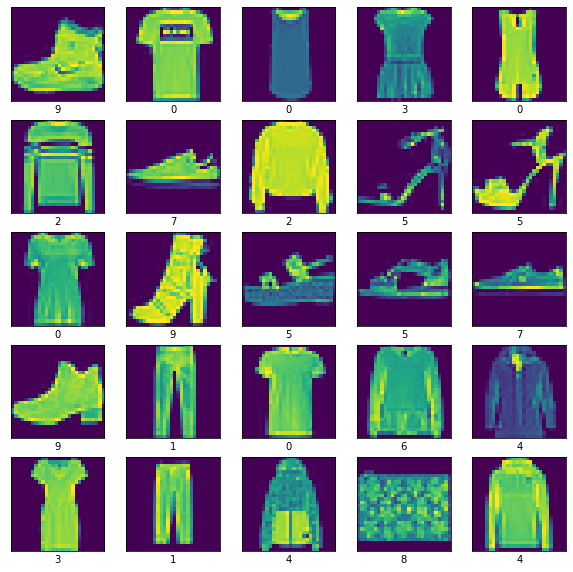

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(Y_train[i])
plt.show()

In [ ]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


### Plotting Helper Methods

In [ ]:
IMG_PATH = "/content/gdrive/MyDrive/Images/Assignment_3/"

def plot_and_save(model_name, history, img_path = IMG_PATH):

  plt.clf()

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(model_name + "_Accuracy")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='center right')
  plt.savefig(f"{img_path}/{model_name}_Accuracy.png")

  plt.clf()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(model_name + "_Loss")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='center right')
  plt.savefig(f"{img_path}/{model_name}_Loss.png")
  

# Constants

In [ ]:
img_width, img_height, num_channels = 28, 28, 1


### Part - 1
3 Networks with varing hidden layers but with same number of neuron counts

In [ ]:
def build_and_evaluate_model_part_1(hidden_layers, model_name):
  model = Sequential([
      keras.layers.Rescaling(1./255, input_shape = (img_height, img_width, num_channels)) ] + hidden_layers + [keras.layers.Flatten(), keras.layers.Dense(128, activation = "relu"), keras.layers.Dense(10)], name = model_name)

  model.summary()
  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  
  history = model.fit(X_train, Y_train, batch_size = 32, validation_split = 0.2, epochs = 20)
  loss, acc = model.evaluate(X_test, Y_test)
  plot_and_save(model_name, history, IMG_PATH + "/Part_1/")
  print(f"Test Accuracy for {model_name}", acc)
  return model, loss, acc


Model: "1_Conv_Layer_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 128)               6422656   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 6,424,586
Trainable params: 6,424,586
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1500/1500 [================

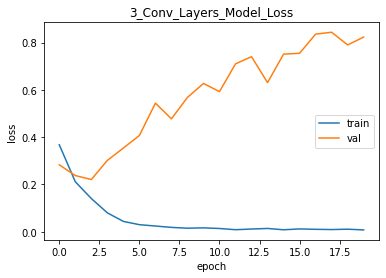

In [ ]:
part_1_results = []

lyrs = [
    [keras.layers.Conv2D(64, 3, padding = "same", activation = "relu")],
    [keras.layers.Conv2D(64, 3, padding = "same", activation = "relu"), keras.layers.Conv2D(64, 3, padding = "same", activation = "relu")],
    [keras.layers.Conv2D(64, 3, padding = "same", activation = "relu"), keras.layers.Conv2D(64, 3, padding = "same", activation = "relu"), keras.layers.Conv2D(64, 3, padding = "same", activation = "relu")],
]

part_1_results.append(build_and_evaluate_model_part_1(lyrs[0], "1_Conv_Layer_Model"))
part_1_results.append(build_and_evaluate_model_part_1(lyrs[1], "2_Conv_Layers_Model"))
part_1_results.append(build_and_evaluate_model_part_1(lyrs[2], "3_Conv_Layers_Model"))

### Part - 2
10 Networks with same number of layers and different number of neurons per layer

In [ ]:

def build_and_evaluate_model_part_2(model_name, output_channels = 16):
  model = Sequential([
      keras.layers.Rescaling(1./255, input_shape = (img_height, img_width, num_channels)),
      keras.layers.Conv2D(output_channels, 3, padding = "same", activation = "relu"),
      keras.layers.Conv2D(output_channels, 3, padding = "same", activation = "relu"),
      keras.layers.Conv2D(output_channels, 3, padding = "same", activation = "relu"),
      keras.layers.Flatten(),
      keras.layers.Dense(128, activation = "relu"),
      keras.layers.Dense(10)
  ], name = model_name)

  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  
  history = model.fit(X_train, Y_train, batch_size = 32, validation_split = 0.2, epochs = 20)
  loss, acc = model.evaluate(X_test, Y_test)
  plot_and_save(model_name, history, IMG_PATH + "/Part_2/")
  print(f"Test Accuracy for {model_name}", acc)
  return model, loss, acc


Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4811 - accuracy: 0.8330 - val_loss: 0.3658 - val_accuracy: 0.8703
Epoch 2/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3401 - accuracy: 0.8766 - val_loss: 0.3269 - val_accuracy: 0.8798
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2922 - accuracy: 0.8931 - val_loss: 0.3181 - val_accuracy: 0.8865
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2591 - accuracy: 0.9035 - val_loss: 0.3159 - val_accuracy: 0.8872
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2287 - accuracy: 0.9151 - val_loss: 0.2972 - val_accuracy: 0.8938
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2007 - accuracy: 0.9237 - val_loss: 0.2959 - val_accuracy: 0.9006
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1794 - accuracy: 0.9328 - val_loss: 0.3110 - val_accuracy:

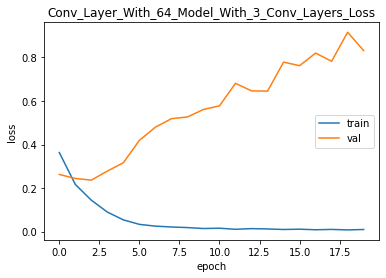

In [ ]:
part_2_results = []
for output_feature in [2, 4, 6, 8, 10, 12 , 14, 16, 32, 64]:
  model_name = f"Conv_Layer_With_{output_feature}_Model_With_3_Conv_Layers"
  part_2_results.append(build_and_evaluate_model_part_2(model_name, output_feature))

In [ ]:
print(part_1_results)

[(<keras.engine.sequential.Sequential object at 0x7f493e772190>, 0.9095115065574646, 0.8952999711036682), (<keras.engine.sequential.Sequential object at 0x7f4941201490>, 1.1138688325881958, 0.9057000279426575), (<keras.engine.sequential.Sequential object at 0x7f494125c890>, 0.9085272550582886, 0.9097999930381775)]


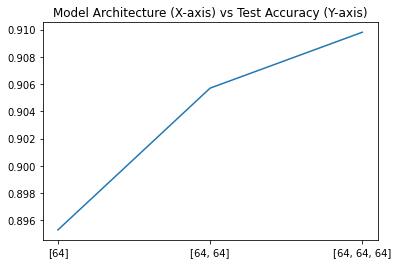

In [ ]:
# Plotting conclusion graph for part-1
x_axis = [ "[64]", "[64, 64]", "[64, 64, 64]"]
y_axis = [ x[2] for x in part_1_results ]

dummy = [ i for i in range(1, len(x_axis) + 1)]
plt.clf()

plt.plot(dummy, y_axis)
plt.xticks(dummy, x_axis)
plt.title("Model Architecture (X-axis) vs Test Accuracy (Y-axis)")
plt.show()

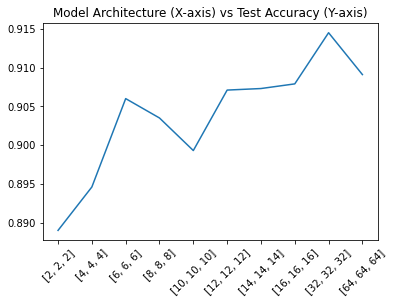

In [ ]:
# Plotting conclusion graph for part-1
x_axis = [ "[2, 2, 2]", "[4, 4, 4]", "[6, 6, 6]", "[8, 8, 8]", "[10, 10, 10]", "[12, 12, 12]", "[14, 14, 14]", "[16, 16, 16]", "[32, 32, 32]", "[64, 64, 64]"]
y_axis = [ x[2] for x in part_2_results ]

dummy = [ i for i in range(1, len(x_axis) + 1)]

plt.clf()

plt.plot(dummy, y_axis)
plt.xticks(dummy, x_axis, rotation = 45)
plt.title("Model Architecture (X-axis) vs Test Accuracy (Y-axis)")
plt.show()